#                            DATA SCIENCE PROJECT
Topic : Tool Life Analysis
Team Members ME20B2019 Nikhil Singh,
ME20B2040 Rishikesh Yadav

## Data Collection
we are using the data of Tool Failure in which the tool failure is derived from the different sensors values that are present in the data set, using that data set we are going design a model (or train a model) to predict the failure of the tool (or instrument.).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("Tools_Failure_Data.csv", index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 149855 entries, 1.0 to nan
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  149855 non-null  int64  
 1   REGION_CLUSTER      149855 non-null  object 
 2   MAINTENANCE_VENDOR  149855 non-null  object 
 3   MANUFACTURER        149855 non-null  object 
 4   WELL_GROUP          149855 non-null  int64  
 5   S15                 149855 non-null  float64
 6   S17                 149855 non-null  float64
 7   S13                 149855 non-null  float64
 8   S5                  149855 non-null  float64
 9   S16                 149855 non-null  float64
 10  S19                 149855 non-null  float64
 11  S18                 149855 non-null  float64
 12  EQUIPMENT_FAILURE   149855 non-null  int64  
 13  S8                  149855 non-null  float64
 14  AGE_OF_EQUIPMENT    149855 non-null  int64  
dtypes: float64(8), int64(4), object(3

## DATA ANALYSIS
Here we are doing the data analysis in which we will analyze the data and figure out what are required for model training or what are the things are not required for the model in which we'll check several things like correlation with different columns, importance of the in predicting the tool failure.

In [2]:
print(data.shape,"\n")
data.head(10)


(149855, 15) 



,ID,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
S.No,,,,,,,,,,,,,,,
1.0,100001,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.0,880
2.0,100001,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.0,881
3.0,100001,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.0,882
4.0,100001,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.0,883
5.0,100001,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.0,884
6.0,100001,G,O,Y,1,7.971100,164.545833,38.74,3448.0,6.645075,1.5,24.845833,0,0.0,885
7.0,100001,G,O,Y,1,11.009948,175.852174,38.84,3457.0,6.401404,1.5,24.886957,0,0.0,886
8.0,100001,G,O,Y,1,8.283491,136.767273,39.58,3523.0,8.507864,2.9,24.904545,0,0.0,887
9.0,100001,G,O,Y,1,7.577143,182.293333,39.78,3540.0,9.884905,2.9,24.933333,0,0.0,888


In [3]:
#checking how many unique id are present in the dataset
t0= pd.DataFrame(data.groupby(['ID']).agg(['count']))
t0.shape

(205, 14)

In [4]:
#checking for the null values in the dataset
data.isnull().sum(axis = 0)

ID                    0
REGION_CLUSTER        0
MAINTENANCE_VENDOR    0
MANUFACTURER          0
WELL_GROUP            0
S15                   0
S17                   0
S13                   0
S5                    0
S16                   0
S19                   0
S18                   0
EQUIPMENT_FAILURE     0
S8                    0
AGE_OF_EQUIPMENT      0
dtype: int64

### Descriptive Statistical  analysis of the data
In the descriptive data analysis we can get the several information about the dataset like count, mean, standard deviation, and several other things which will we very helpful in the analysis of data.

In [5]:
data.describe()

,ID,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
count,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000
mean,100320.419512,2.497561,14.185534,85.918460,35.643733,4557.518000,7.925408,8.229842,110.082879,0.001368,117.481750,2751.146341
std,178.503502,1.093775,8.665254,85.572229,14.723678,2497.993986,2.426462,13.041714,197.356230,0.036961,204.107481,3368.354905
min,100001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.490000,0.000000
25%,100164.000000,2.000000,7.548000,0.000000,28.250000,3193.000000,6.596000,0.900000,11.300000,0.000000,8.660000,755.000000
50%,100328.000000,2.000000,11.077500,95.480000,35.020000,4224.000000,8.025600,4.200000,34.000000,0.000000,44.320000,1143.000000
75%,100472.000000,3.000000,22.080000,163.660000,41.940833,5615.000000,9.480700,10.500000,118.900000,0.000000,135.080000,3224.500000
max,100612.000000,4.000000,51.225600,478.470000,570.510000,52767.000000,23.533800,291.100000,3995.900000,1.000000,1824.960000,15170.000000


In [6]:
data['EQUIPMENT_FAILURE']

S.No
1.0    0
2.0    0
3.0    0
4.0    0
5.0    0
      ..
NaN    0
NaN    0
NaN    0
NaN    0
NaN    0
Name: EQUIPMENT_FAILURE, Length: 149855, dtype: int64

In [7]:
data.corr(method='pearson')

,ID,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
ID,1.000000e+00,4.260417e-02,-0.094794,0.103473,-0.014240,0.065973,0.089698,-0.066104,0.096050,-1.002965e-15,0.117254,-0.008935
WELL_GROUP,4.260417e-02,1.000000e+00,0.033132,-0.036045,-0.116080,-0.008014,-0.014340,0.040838,0.067518,1.755806e-17,0.077956,-0.020479
S15,-9.479365e-02,3.313163e-02,1.000000,-0.630659,0.035780,0.220332,-0.120053,0.218456,0.387135,-5.997746e-02,0.318021,0.033443
S17,1.034729e-01,-3.604466e-02,-0.630659,1.000000,0.116458,-0.124953,0.189844,-0.171932,-0.401177,-3.673575e-02,-0.314717,-0.016886
S13,-1.424038e-02,-1.160800e-01,0.035780,0.116458,1.000000,0.514555,0.111472,-0.032874,-0.052618,-5.387080e-03,-0.018749,0.028246
S5,6.597259e-02,-8.014239e-03,0.220332,-0.124953,0.514555,1.000000,-0.068876,0.244719,0.444225,-4.194914e-03,0.455531,0.052062
S16,8.969762e-02,-1.434029e-02,-0.120053,0.189844,0.111472,-0.068876,1.000000,-0.163206,0.002865,-8.667327e-03,0.030203,0.013247
S19,-6.610383e-02,4.083826e-02,0.218456,-0.171932,-0.032874,0.244719,-0.163206,1.000000,0.193813,-8.325554e-03,0.171897,0.007109
S18,9.605004e-02,6.751845e-02,0.387135,-0.401177,-0.052618,0.444225,0.002865,0.193813,1.000000,1.283648e-02,0.860042,-0.004092
EQUIPMENT_FAILURE,-1.002965e-15,1.755806e-17,-0.059977,-0.036736,-0.005387,-0.004195,-0.008667,-0.008326,0.012836,1.000000e+00,0.007830,0.000499


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 149855 entries, 1.0 to nan
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  149855 non-null  int64  
 1   REGION_CLUSTER      149855 non-null  object 
 2   MAINTENANCE_VENDOR  149855 non-null  object 
 3   MANUFACTURER        149855 non-null  object 
 4   WELL_GROUP          149855 non-null  int64  
 5   S15                 149855 non-null  float64
 6   S17                 149855 non-null  float64
 7   S13                 149855 non-null  float64
 8   S5                  149855 non-null  float64
 9   S16                 149855 non-null  float64
 10  S19                 149855 non-null  float64
 11  S18                 149855 non-null  float64
 12  EQUIPMENT_FAILURE   149855 non-null  int64  
 13  S8                  149855 non-null  float64
 14  AGE_OF_EQUIPMENT    149855 non-null  int64  
dtypes: float64(8), int64(4), object(3

### Data Visualization
In this method we are going to visualize the data using different graphs 

<AxesSubplot:xlabel='S8'>

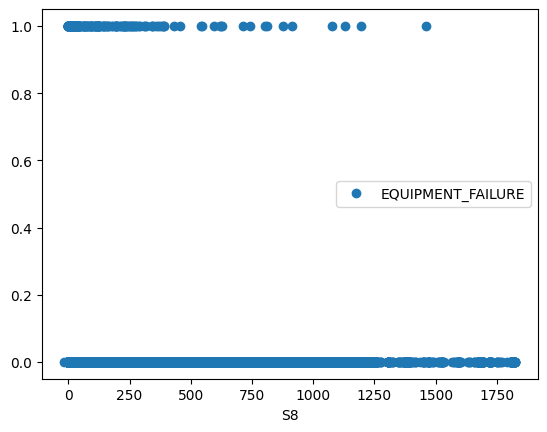

In [10]:
data.plot(x='S8', y='EQUIPMENT_FAILURE', style='o')

<AxesSubplot:ylabel='Frequency'>

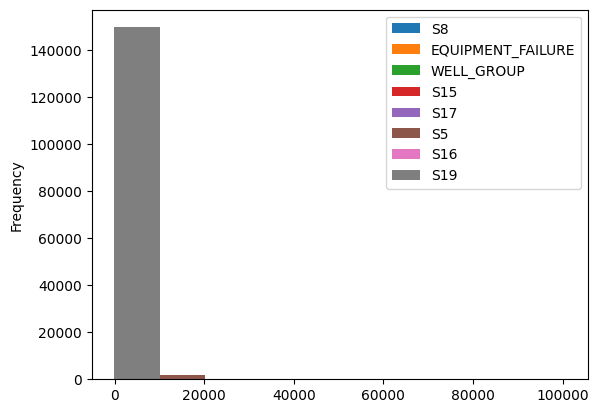

In [11]:
data.plot(column=["S8","EQUIPMENT_FAILURE", "WELL_GROUP", "S15", "S17", "S5", "S16", "S19"], kind='hist')

<AxesSubplot:ylabel='Frequency'>

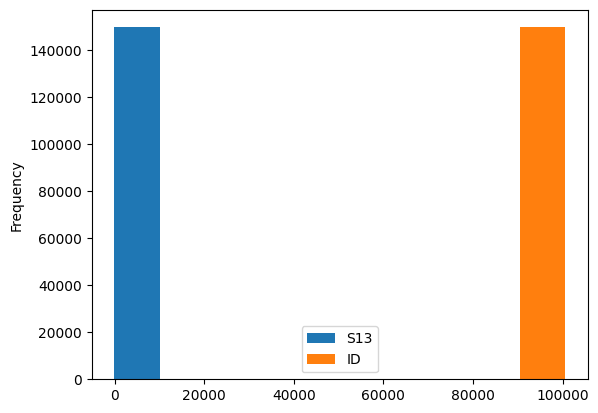

In [12]:
data.plot(column=["S13","ID"], kind='hist')

<AxesSubplot:xlabel='S18'>

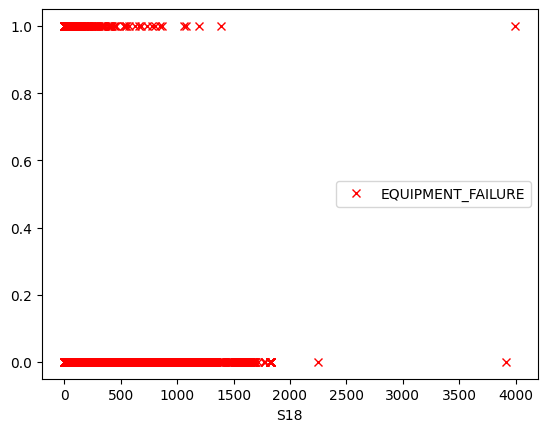

In [13]:
data.plot(x='S18', y='EQUIPMENT_FAILURE', style='rx')

<AxesSubplot:xlabel='S16'>

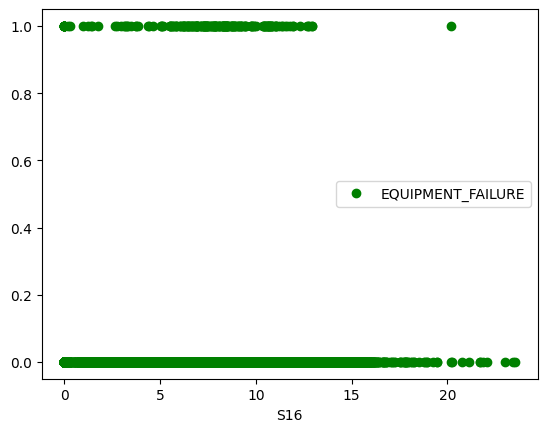

In [14]:
data.plot(x='S16', y='EQUIPMENT_FAILURE', style='o', color="g")

## Data cleaning 
In this step we are going to do the data cleaning, as per our data analysis we are going to reduce some features which is not required for model training and some other neccessary task we will do in the data cleaning.

In [15]:
#Dropping manfacturer, region, and vendor since its not related to tool failiure as we can see from correlation
data.drop(['MANUFACTURER'],axis=1,inplace=True)
data.drop(['REGION_CLUSTER'],axis=1,inplace=True)
data.drop(['MAINTENANCE_VENDOR'],axis=1,inplace=True)
data

,ID,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
S.No,,,,,,,,,,,,
1.0,100001,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.00,880
2.0,100001,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.00,881
3.0,100001,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.00,882
4.0,100001,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.00,883
5.0,100001,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.00,884
...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,100612,4,19.680000,0.000000,24.03,7329.0,4.560000,29.0,95.000000,0,73.67,1086
NaN,100612,4,28.320000,0.000000,24.36,7429.0,4.600000,30.1,95.000000,0,53.18,1087
NaN,100612,4,20.400000,0.000000,24.14,7364.0,3.680000,30.1,94.000000,0,53.70,1088


In [16]:
from sklearn.preprocessing import LabelEncoder
op=LabelEncoder()
label=op.fit_transform(data['EQUIPMENT_FAILURE'])
data["EQUIPMENT_FAILURE"]=label
data

,ID,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
S.No,,,,,,,,,,,,
1.0,100001,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.00,880
2.0,100001,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.00,881
3.0,100001,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.00,882
4.0,100001,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.00,883
5.0,100001,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.00,884
...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,100612,4,19.680000,0.000000,24.03,7329.0,4.560000,29.0,95.000000,0,73.67,1086
NaN,100612,4,28.320000,0.000000,24.36,7429.0,4.600000,30.1,95.000000,0,53.18,1087
NaN,100612,4,20.400000,0.000000,24.14,7364.0,3.680000,30.1,94.000000,0,53.70,1088


In [17]:
#Standardizing the Data Set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.drop('EQUIPMENT_FAILURE', axis=1))
scaled_features = scaler.transform(data.drop('EQUIPMENT_FAILURE', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = data.drop('EQUIPMENT_FAILURE', axis=1).columns)
scaled_data

,ID,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,S8,AGE_OF_EQUIPMENT
0,-1.789436,-1.369172,-0.357467,0.693042,0.251043,-0.422948,0.206664,-0.485355,-0.433089,-0.575590,-0.555509
1,-1.789436,-1.369172,-0.612516,1.187945,0.241535,-0.427752,-0.594157,-0.485355,-0.432780,-0.575590,-0.555212
2,-1.789436,-1.369172,-0.635770,0.729740,0.219122,-0.439762,-0.727708,-0.477687,-0.432466,-0.575590,-0.554916
3,-1.789436,-1.369172,-0.484372,0.557911,0.259873,-0.418144,0.574872,-0.477687,-0.432264,-0.575590,-0.554619
4,-1.789436,-1.369172,-0.658987,1.300229,0.318282,-0.387720,0.040204,-0.516026,-0.432088,-0.575590,-0.554322
...,...,...,...,...,...,...,...,...,...,...,...
149850,1.633478,1.373632,0.634082,-1.004049,-0.788782,1.109487,-1.386965,1.592600,-0.076425,-0.214651,-0.494352
149851,1.633478,1.373632,1.631171,-1.004049,-0.766369,1.149519,-1.370481,1.676945,-0.076425,-0.315040,-0.494055
149852,1.633478,1.373632,0.717173,-1.004049,-0.781311,1.123498,-1.749635,1.676945,-0.081492,-0.312492,-0.493758
149853,1.633478,1.373632,1.631171,-1.004049,-0.757540,1.165532,-1.766120,1.676945,-0.076425,-0.214406,-0.493461


## Training And Testing 
### Using K-MEAN Clustering
In the training and testing we are going to use the final cleaned data for the training and testing in which we'll create variables one will store the features of the dataset and one will store the outcome of that features and then we'll split the data in 70-30%. 70% for the training of model and 30% from the testing.

In [18]:
from sklearn.model_selection import train_test_split
x = scaled_data
y = data['EQUIPMENT_FAILURE']

In [19]:
x

,ID,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,S8,AGE_OF_EQUIPMENT
0,-1.789436,-1.369172,-0.357467,0.693042,0.251043,-0.422948,0.206664,-0.485355,-0.433089,-0.575590,-0.555509
1,-1.789436,-1.369172,-0.612516,1.187945,0.241535,-0.427752,-0.594157,-0.485355,-0.432780,-0.575590,-0.555212
2,-1.789436,-1.369172,-0.635770,0.729740,0.219122,-0.439762,-0.727708,-0.477687,-0.432466,-0.575590,-0.554916
3,-1.789436,-1.369172,-0.484372,0.557911,0.259873,-0.418144,0.574872,-0.477687,-0.432264,-0.575590,-0.554619
4,-1.789436,-1.369172,-0.658987,1.300229,0.318282,-0.387720,0.040204,-0.516026,-0.432088,-0.575590,-0.554322
...,...,...,...,...,...,...,...,...,...,...,...
149850,1.633478,1.373632,0.634082,-1.004049,-0.788782,1.109487,-1.386965,1.592600,-0.076425,-0.214651,-0.494352
149851,1.633478,1.373632,1.631171,-1.004049,-0.766369,1.149519,-1.370481,1.676945,-0.076425,-0.315040,-0.494055
149852,1.633478,1.373632,0.717173,-1.004049,-0.781311,1.123498,-1.749635,1.676945,-0.081492,-0.312492,-0.493758
149853,1.633478,1.373632,1.631171,-1.004049,-0.757540,1.165532,-1.766120,1.676945,-0.076425,-0.214406,-0.493461


In [20]:
y

S.No
1.0    0
2.0    0
3.0    0
4.0    0
5.0    0
      ..
NaN    0
NaN    0
NaN    0
NaN    0
NaN    0
Name: EQUIPMENT_FAILURE, Length: 149855, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Performance Analysis 
In this we are going t do the performance analysis in which we are checking the percentage accuracy of the prediction with differnet K values and find the most efficient k value for the prediction

In [23]:
from sklearn import metrics
print(metrics.accuracy_score(y_test_data, predictions))

0.9974197566563605


In [24]:
k_range = range(1, 21)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_training_data, y_training_data)
    y_pred = knn.predict(x_test_data)
    scores.append(metrics.accuracy_score(y_test_data, y_pred))
print(scores)


[0.9974197566563605, 0.9985096870342772, 0.9985096870342772, 0.9985319305113776, 0.9985319305113776, 0.9985319305113776, 0.9985319305113776, 0.9985319305113776, 0.9985319305113776, 0.9985319305113776, 0.9985319305113776, 0.9985319305113776, 0.9985319305113776, 0.9985319305113776, 0.9985319305113776, 0.9985319305113776, 0.9985319305113776, 0.9985319305113776, 0.9985319305113776, 0.9985319305113776]


Text(0, 0.5, 'Testing Accuracy')

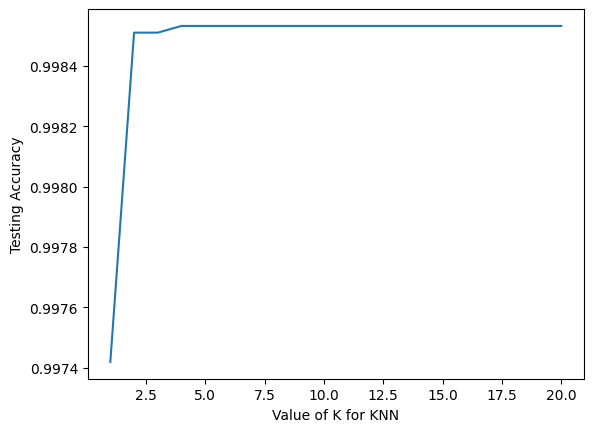

In [25]:
%matplotlib inline
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

